# 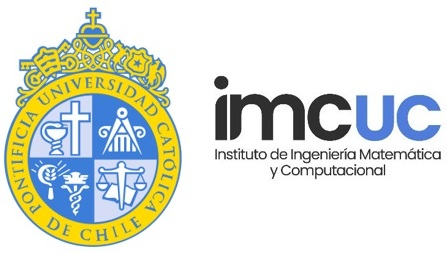  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre:** 2024-2<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Interrogación 2</center></h1>

## Instrucciones

* Esta parte de la Interrogación debe ser desarrollada completamente en lenguaje de programación Python en este Notebook de Jupyter.

* El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. <br>
* La entrega de la interrogación se realizará a través de Canvas en la actividad `I2 Desarrollo`.
* Esta Interrogación debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
* Está **estrictamente prohibido comunicarse con sus compañeros de curso o terceras personas** durante el desarrollo de esta interrogación.
* Puede consultar documentación online y apuntes del curso de todo tipo.
* Habrá sólo dos instancias para hacer preguntas, una al inicio de la prueba y otra a los 30 minutos de avance.<br>


* Ud. dispone de 1 hora para desarrollar esta interrogación.
* Recuerde **guardar frecuentemente sus avances** para evitar pérdidas de trabajo o problemas de envío.<br>

*** 
## Parte 2: Trabajo de Desarrollo (60 min y 100 puntos)

Esta parte de la Interrogación es un trabajo práctico con datos. En esta parte, cada pregunta debe ser respondida desarrollando un código por usted que le permita entregar una respuesta. **No se evaluarán respuestas sin código**.

En la siguiente celda puede poner las librerías que necesita para ir contestando las siguientes preguntas. No es obligatorio usar esta celda para ello, pero se deja disponible en caso que sea de utilidad. Siéntase libre de agregar celdas en cada pregunta según necesite.

In [182]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Datos

Para esta parte de la Interrogación estaremos usando dos bases de datos públicas del Gobierno de Chile.

Primero, usaremos una base de datos con la información de atenciones de urgencia en la Región del Maule para todo el 2023 (`AtencionesUrgenciaMaule2023.csv`).

Como segunda base, usaremos con una base de datos de información ambiental proveniente del Sistema de Información Nacional de Calidad del Aire (SINCA) que pueden encontrar acá https://sinca.mma.gob.cl/ (`datos_230101_231231.csv`), que tiene la calidad del aire para la ciudad de Cauquenes, en la Región del Maule, durante todo el 2023.

## 1. Limpieza y transformación

Realice las siguientes actividades para terminar con un DataFrames que estén limpios y listos para poder hacer las actividades posteriores.

### (*2 pt*) 1.1 Preparación DataFrame de Urgencias

Cargue los datos del archivo `AtencionesUrgenciaMaule2023.csv` en un DataFrame de pandas llamado `urgencias`. Revise el separador usado en el archivo para leerlo correctamente. Si obtiene un mensaje de error al leer el archivo (dependiendo de su sistema operativo y la configuración) puede usar el parámetro `encoding = "latin"` como parámetro en la lectura del archivo.

In [187]:
urgencias = pd.read_csv("data_2024/AtencionesUrgenciaMaule2023.csv", encoding="latin")
urgencias

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna
0,16-107,Hospital de ConstituciÃ³n,40,"Trastornos neurÃ³ticos, trastornos relacionado...",0,0,0,0,0,0,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7102,ConstituciÃ³n
1,16-954,SUR Mercedes,18,TOTAL TRAUMATISMOS Y ENVENENAMIENTO,0,0,0,0,0,0,...,27,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca
2,16-831,SAPU Carlos Trupp,35,Lesiones autoinfligidas intencionalmente (X60-...,0,0,0,0,0,0,...,27,SAPU,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca
3,16-813,SAR Luis Tobar Rojas,40,"Trastornos neurÃ³ticos, trastornos relacionado...",3,0,0,0,3,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7109,San Clemente
4,16-954,SUR Mercedes,35,Lesiones autoinfligidas intencionalmente (X60-...,0,0,0,0,0,0,...,27,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859835,201043,SUR La Huerta de HualaÃ±Ã©,34,TOTAL DEMANDA,1,0,0,0,0,1,...,1,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7302,HualaÃ±Ã©
859836,16-107,Hospital de ConstituciÃ³n,34,TOTAL DEMANDA,101,1,9,7,65,19,...,1,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7102,ConstituciÃ³n
859837,16-813,SAR Luis Tobar Rojas,34,TOTAL DEMANDA,186,3,20,27,111,25,...,1,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7109,San Clemente
859838,16-952,SUR Sagrada Familia,14,Accidente vascular encefÃ¡lico,0,0,0,0,0,0,...,11,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7307,Sagrada Familia


### (*2 pt*) 1.2 Filtrado

Estamos interesados en conectar ambas bases de datos, por lo que debemos filtrar la base de Urgencias para dejar sólo la información de la ciudad de Cauquenes. Filtre el DataFrame anterior para dejar sólo las filas que tienen `Cauquenes` como `NombreComuna`. Mantengan el mismo nombre `urgencias` al DataFrame.

In [189]:
urgencias = urgencias[urgencias["NombreComuna"]=="Cauquenes"]

### (*6 pts*) 1.3 Limpieza básica de `urgencias`

En la siguientes celdas (puede agregar celdas si lo necesita) revise el DataFrame `urgencias` y realice las siguientes transformaciones:

- Elimine todas las muestras que tengan algún dato nulo entre sus columnas.
- Identifique y luego eliminar los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna y corrija si no están correctos. Asegure que la columna `fecha` este en el formato adecuado.

In [191]:
urgencias.dropna(subset = urgencias.columns, inplace=True)
urgencias

C:\Users\alejo\AppData\Local\Temp\ipykernel_4660\3675895595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urgencias.dropna(subset = urgencias.columns, inplace=True)


,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna
25,16-829,SAR Dr. Juan Saavedra Macaya,20,Otras causas externas,6,1,0,0,5,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
26,16-111,Hospital San Juan de Dios (Cauquenes),20,Otras causas externas,9,0,0,0,7,2,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
44,16-829,SAR Dr. Juan Saavedra Macaya,33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
45,16-111,Hospital San Juan de Dios (Cauquenes),33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
66,16-829,SAR Dr. Juan Saavedra Macaya,42,- CAUSAS POR TRASTORNOS MENTALES (F00-F99),0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859743,16-829,SAR Dr. Juan Saavedra Macaya,6,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0,...,8,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
859760,16-829,SAR Dr. Juan Saavedra Macaya,24,CIRUGÃAS DE URGENCIA,0,0,0,0,0,0,...,8,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
859790,16-111,Hospital San Juan de Dios (Cauquenes),31,"Covid-19, Virus no identificado U07.2",11,0,0,1,7,3,...,1,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
859792,16-829,SAR Dr. Juan Saavedra Macaya,31,"Covid-19, Virus no identificado U07.2",2,0,0,0,2,0,...,1,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes


In [192]:
duplicados = urgencias.duplicated(keep=False)
print(len(duplicados))
duplicados

29200


25        False
26        False
44        False
45        False
66        False
          ...  
859743    False
859760    False
859790    False
859792    False
859807    False
Length: 29200, dtype: bool

In [193]:
urgencias = urgencias.drop_duplicates(keep='first')

In [194]:
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29200 entries, 25 to 859807
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   IdEstablecimiento         29200 non-null  object
 1   NEstablecimiento          29200 non-null  object
 2   IdCausa                   29200 non-null  int64 
 3   GlosaCausa                29200 non-null  object
 4   Total                     29200 non-null  int64 
 5   Menores_1                 29200 non-null  int64 
 6   De_1_a_4                  29200 non-null  int64 
 7   De_5_a_14                 29200 non-null  int64 
 8   De_15_a_64                29200 non-null  int64 
 9   De_65_y_mas               29200 non-null  int64 
 10  fecha                     29200 non-null  object
 11  semana                    29200 non-null  int64 
 12  GLOSATIPOESTABLECIMIENTO  29200 non-null  object
 13  GLOSATIPOATENCION         29200 non-null  object
 14  GlosaTipoCampana         

In [195]:
urgencias["fecha"]

25        04/07/2023
26        04/07/2023
44        04/07/2023
45        04/07/2023
66        04/07/2023
             ...    
859743    19/02/2023
859760    19/02/2023
859790    06/01/2023
859792    06/01/2023
859807    17/03/2023
Name: fecha, Length: 29200, dtype: object

In [196]:
# transformacion de fecha a datetime
urgencias["fecha"] = pd.to_datetime(urgencias["fecha"], format='mixed')
urgencias["fecha"]

25       2023-04-07
26       2023-04-07
44       2023-04-07
45       2023-04-07
66       2023-04-07
            ...    
859743   2023-02-19
859760   2023-02-19
859790   2023-06-01
859792   2023-06-01
859807   2023-03-17
Name: fecha, Length: 29200, dtype: datetime64[ns]

### (*2 pt*) 1.4 Preparación DataFrame `SINCA`

Cargue los datos del archivo `datos_230101_231231.csv` en un DataFrame de pandas llamado `sinca`. Igual que en el caso anterior, revise el separador usado por el archivo para leerlo correctamente. 

In [270]:
sinca = pd.read_csv("data_2024/datos_230101_231231.csv", encoding="latin", sep=";")
sinca

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,Unnamed: 5
0,230101,0,7.0,NaN,NaN,NaN
1,230102,0,5.0,NaN,NaN,NaN
2,230103,0,6.0,NaN,NaN,NaN
3,230104,0,5.0,NaN,NaN,NaN
4,230105,0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
359,231226,0,8.0,NaN,NaN,NaN
360,231227,0,8.0,NaN,NaN,NaN
361,231228,0,4.0,NaN,NaN,NaN
362,231229,0,5.0,NaN,NaN,NaN


### (*5 pts*) 1.5 Limpieza básica de `SINCA`

Al igual que con el DataFrame `urgencias`, revise este nuevo DataFrame y realice las siguientes transformaciones:

- Elimine todas las columnas que tengan más de 200 datos nulos entre sus muestras.
- Si hay muestras que tengan algún dato nulo, impute ese valor usando el promedio de los datos cercanos.
- Identifique y luego elimine los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna y corrija si no están correctos. Si hay fechas, deben quedar en formato `datetime64`
- Cambie el nombre de la columna `FECHA (YYMMDD)` por `fecha` para que ambas bases queden con el mismo nombre en la columna de fecha.

In [273]:
maxNull = len(sinca)-200
print(f'Eliminando las columnas que tienen menos de {maxNull} datos no-nulos\n')

sinca = sinca.dropna(axis=1, thresh=maxNull)
sinca.info()

Eliminando las columnas que tienen menos de 164 datos no-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA (YYMMDD)       364 non-null    int64  
 1   HORA (HHMM)          364 non-null    int64  
 2   Registros validados  355 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.7 KB


In [275]:
sinca["Registros validados"] = sinca["Registros validados"].fillna(value=sinca["Registros validados"].mean())
sinca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA (YYMMDD)       364 non-null    int64  
 1   HORA (HHMM)          364 non-null    int64  
 2   Registros validados  364 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.7 KB


C:\Users\alejo\AppData\Local\Temp\ipykernel_4660\3626710993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinca["Registros validados"] = sinca["Registros validados"].fillna(value=sinca["Registros validados"].mean())


In [277]:
sinca = sinca.drop_duplicates(keep='first')
sinca

,FECHA (YYMMDD),HORA (HHMM),Registros validados
0,230101,0,7.0
1,230102,0,5.0
2,230103,0,6.0
3,230104,0,5.0
4,230105,0,4.0
...,...,...,...
359,231226,0,8.0
360,231227,0,8.0
361,231228,0,4.0
362,231229,0,5.0


In [291]:
sinca["FECHA (YYMMDD)"] = pd.to_datetime(sinca["FECHA (YYMMDD)"], format="mixed")
#no me funcion astype ni format = '%d-%m-%Y' para pasar las fechas en sinca, debido a eso quedaron medio separadas
sinca["FECHA (YYMMDD)"]

0     1970-01-01 00:00:00.000230101
1     1970-01-01 00:00:00.000230102
2     1970-01-01 00:00:00.000230103
3     1970-01-01 00:00:00.000230104
4     1970-01-01 00:00:00.000230105
                   ...             
359   1970-01-01 00:00:00.000231226
360   1970-01-01 00:00:00.000231227
361   1970-01-01 00:00:00.000231228
362   1970-01-01 00:00:00.000231229
363   1970-01-01 00:00:00.000231230
Name: FECHA (YYMMDD), Length: 364, dtype: datetime64[ns]

In [293]:
sinca.rename(columns={'FECHA (YYMMDD)': 'fecha'}, inplace=True)
sinca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                364 non-null    datetime64[ns]
 1   HORA (HHMM)          364 non-null    int64         
 2   Registros validados  364 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


## 2. EDA

En esta pregunta exploraremos los dos DataFrames de la Pregunta 1. 

Comenzaremos por el DataFrame de `urgencias` que tiene, para cada establecimiento, día y causa, la cantidad de pacientes que vistó el establecimiento en la columna `Total`. Además, las columnas `[Menores_1, De_1_a_4, De_5_a_14, De_15_a_64, De_65_y_mas]` tiene la distribución por del `Total` de visitas por cada grupo de edad.

### (*2 pts*) 2.1 Filtrando datos

El dataframe `urgencias` tiene una columna llamada `GlosaCausa` que identifica la causa de cada visita. Genere un listado de los valores únicos que tiene esa columna para que podamos identificar los nombres de las patologías por las que han ido los pacientes a cada lugar.

In [297]:
unicos = urgencias["GlosaCausa"].unique()
unicos

array(['Otras causas externas',
       ' - COVID-19, VIRUS NO IDENTIFICADO U07.2',
       ' - CAUSAS POR TRASTORNOS MENTALES (F00-F99)',
       'CIRUGÃ\x8dAS DE URGENCIA',
       'Trastornos mentales y del comportamiento debidos al uso de sustancias psicoactivas (F10-F19)',
       'Otros trastornos mentales no contenidos en las categorÃ\xadas anteriores',
       'CAUSAS SISTEMA RESPIRATORIO', 'IRA Alta (J00-J06)',
       'Bronquitis/bronquiolitis aguda (J20-J21)',
       'Crisis obstructiva bronquial (J40-J46)',
       'Covid-19, Virus identificado U07.1',
       'Accidente vascular encefÃ¡lico', 'Crisis hipertensiva',
       'TOTAL TRAUMATISMOS Y ENVENENAMIENTO',
       'Lesiones autoinfligidas intencionalmente (X60-X84)',
       'TOTAL CAUSAS DE TRASTORNOS MENTALES (F00-F99)',
       'Influenza (J09-J11)', 'Covid-19, Virus no identificado U07.2',
       'Arritmia grave', 'Otras causas circulatorias',
       'IdeaciÃ³n Suicida (R45.8)',
       'Trastornos del Humor (Afectivos) (F30-F3

### (*2 pts*) 2.2 Identificando enfermedades respiratorias

Como verá en el listado creado, hay un conjunto de causas asociadas a enfermedades respiratorias. Revisando en detalle podrá notar que las causas con `IdCausa` en el siguiente listado están asociados a enfermedades respiratorias:
`causas = [3,4,6,5,2,7,11,10,30,31]`. 

Genere un nuevo DataFrame llamado `urgenciasRespiratorias` que tenga sólo las columnas 

`['fecha', 'GlosaCausa', 'Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']`

con las visitas sólo bajo los `IdCausa` antes mencionados y que agrupe la cantidad de eventos para toda la comuna, sin importar el establecimiento de salud en el que ocurrió.

In [300]:
causas = [3,4,6,5,2,7,11,10,30,31]
datos_buscados1 = urgencias[urgencias["IdCausa"] == 3]
datos_buscados2 = urgencias[urgencias["IdCausa"] == 4]
datos_buscados3 = urgencias[urgencias["IdCausa"] == 6]
datos_buscados4 = urgencias[urgencias["IdCausa"] == 5]
datos_buscados5 = urgencias[urgencias["IdCausa"] == 2]
datos_buscados6 = urgencias[urgencias["IdCausa"] == 7]
datos_buscados7 = urgencias[urgencias["IdCausa"] == 11]
datos_buscados8 = urgencias[urgencias["IdCausa"] == 10]
datos_buscados9 = urgencias[urgencias["IdCausa"] == 30]
datos_buscados10 = urgencias[urgencias["IdCausa"] == 31]

urgenciasRespiratorias = pd.concat([datos_buscados1, datos_buscados2, datos_buscados3, datos_buscados4, datos_buscados5, datos_buscados6, datos_buscados7, datos_buscados8, datos_buscados9, datos_buscados10], axis=0, join="outer").reset_index(drop=True)
print(urgenciasRespiratorias["IdCausa"].unique())
urgenciasRespiratorias = urgenciasRespiratorias[['fecha', 'GlosaCausa', 'Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']]
urgenciasRespiratorias.info()

[ 3  4  6  5  2  7 11 10 30 31]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        7300 non-null   datetime64[ns]
 1   GlosaCausa   7300 non-null   object        
 2   Total        7300 non-null   int64         
 3   Menores_1    7300 non-null   int64         
 4   De_1_a_4     7300 non-null   int64         
 5   De_5_a_14    7300 non-null   int64         
 6   De_15_a_64   7300 non-null   int64         
 7   De_65_y_mas  7300 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 456.4+ KB


### (*15 pts*) 2.3 EDA sobre enfermedades respiratorias

Analice ahora el DataFrame `urgenciasRespiratorias` haciendo lo siguiente:
- Haga un gráfico que muestre los totales anuales (cantidad total de visitas a todos los establecimientos de salud de Cauquenes) para cada tipo de enfermedad respiratoria.
- Haga un gráfico que muestre los totales anuales para cada grupo de edad.

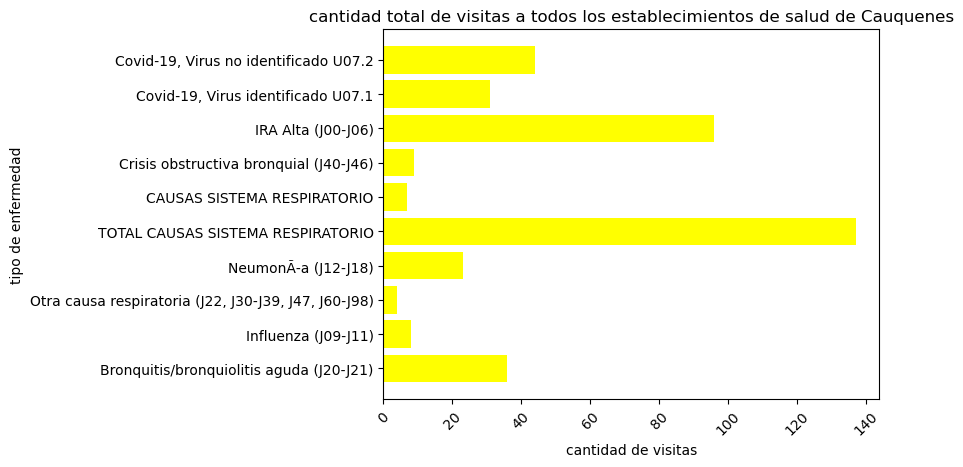

In [303]:
fig, ax = plt.subplots()
ax.set_title("cantidad total de visitas a todos los establecimientos de salud de Cauquenes")
ax.set_ylabel("tipo de enfermedad")
ax.set_xlabel("cantidad de visitas") 
plt.barh(urgenciasRespiratorias["GlosaCausa"], urgenciasRespiratorias["Total"], color="yellow")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### (*10 pts*) 2.4 EDA sobre contaminación

Analice ahora el DataFrame `sinca` haciendo lo siguiente que posee en la columna `Registros validados` el nivel de contaminación por mp2.5 para cada día en la comuna de Cauquenes:
- Haga un gráfico que muestre la evolución del nivel de contaminación a lo largo del año.
- Calcule la media y la varianza del nivel de contaminación a lo largo del año.

In [305]:
print(f"la media es: {sinca["Registros validados"].median()}")
print(f"la varianza es: {sinca["Registros validados"].var()}")

la media es: 11.0
la varianza es: 328.49824234664175


### (*5 pts*) 2.5 Casos de contaminación elevada

Se considera que un nivel de contaminación por mp2.5 superior o igual a 80 ug/m³ es de importancia para la salud. Identifique la cantidad de días en los que se superó ese umbral.

In [307]:
len(sinca[sinca['Registros validados']>=80])

6

## 3. Aprendiendo relaciones

En esta pregunta usaremos herramientas de ML para ver si podemos identificar si hay alguna relación entre el nivel de contaminación y las consultas por enfermedades respiratorias.

Dado que esta es una Interrogación y no tenemos mucho tiempo, para esta sección no necesita hacer validación cruzada cuando haya que entrenar un modelo; sólo separar una única vez entre datos de prueba y entrenamiento y usar eso para contestar las preguntas.

### (*10 pts*) 3.1 Preparando los datos

Nos interesan todas las enfermedades respiratorias, sin importar el tipo, así que agrupe el DataFrame `urgenciasRespiratorias` para que este tenga todas las visitas médicas, sin importar la `GlosaCausa`.

Luego, concatene ambos DataFrames, agregando al DataFrame de `urgenciasRespiratorias`, la contaminación del día correspondiente. Para ello deberá agregar una nueva columna, llamada `mp25` que tenga el valor del DataFrame `sinca` para el día correspondiente.

Haga un scatter plot que muestre la cantidad de casos respiratorios en un eje y el nivel de contaminación en el otro. ¿Observa alguna relación?

In [266]:
datos_agrupados = urgenciasRespiratorias.groupby("GlosaCausa")

#no me funcion astype ni format = '%d-%m-%Y' para pasar las fechas en sinca, debido a eso quedaron medio separadas

df = pd.concat([urgenciasRespiratorias, sinca], axis=0, join="outer").reset_index(drop=True)
df

,fecha,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,HORA (HHMM),Registros validados
0,2023-05-07 00:00:00.000000000,Bronquitis/bronquiolitis aguda (J20-J21),3.0,2.0,0.0,1.0,0.0,0.0,NaN,NaN
1,2023-05-07 00:00:00.000000000,Bronquitis/bronquiolitis aguda (J20-J21),9.0,2.0,0.0,1.0,6.0,0.0,NaN,NaN
2,2023-06-07 00:00:00.000000000,Bronquitis/bronquiolitis aguda (J20-J21),5.0,0.0,0.0,1.0,3.0,1.0,NaN,NaN
3,2023-06-07 00:00:00.000000000,Bronquitis/bronquiolitis aguda (J20-J21),2.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN
4,2023-09-07 00:00:00.000000000,Bronquitis/bronquiolitis aguda (J20-J21),2.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7659,1970-01-01 00:00:00.000231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0
7660,1970-01-01 00:00:00.000231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0
7661,1970-01-01 00:00:00.000231228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0
7662,1970-01-01 00:00:00.000231229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0


### (*4 pts*) 3.2 Relación

Calcule la correlación entre la cantidad de casos respiratorios totales y por grupo de edad, y el nivel de contaminación. ¿Qué nos dice ese número?

Además de mostrar la matriz de correlación, use un gráfico adecuado para visualizar estos valores.

In [311]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Bronquitis/bronquiolitis aguda (J20-J21)'

### (*5 pts*) 3.3 Desfase

Al parecer existe un desfase temporal entre un evento de contaminación y las consultas por enfermedades respiratorias. En general, se estima que el desfase es de 5 días, es decir que, 5 días despúes de un evento de contaminación, una persona muestra síntomas asociados a algún problema respiratorio. 

Tratemos de validar esa hipótesis.

Para ello, crearemos un nuevo DataFrame llamado `sinca_menos_5` que tendrá la fecha desfasada en 5 días. El siguiente código hace eso para usted.

In [313]:
from datetime import timedelta

sinca_menos_5 = sinca.copy(deep=True)
sinca_menos_5['fecha'] = sinca['fecha'] - timedelta(days=5)
sinca_menos_5

,fecha,HORA (HHMM),Registros validados
0,1969-12-27 00:00:00.000230101,0,7.0
1,1969-12-27 00:00:00.000230102,0,5.0
2,1969-12-27 00:00:00.000230103,0,6.0
3,1969-12-27 00:00:00.000230104,0,5.0
4,1969-12-27 00:00:00.000230105,0,4.0
...,...,...,...
359,1969-12-27 00:00:00.000231226,0,8.0
360,1969-12-27 00:00:00.000231227,0,8.0
361,1969-12-27 00:00:00.000231228,0,4.0
362,1969-12-27 00:00:00.000231229,0,5.0


Ahora agregue la columna `mp25_menos_5` al DataFrame `urgenciasRespiratorias`, con el valor del registro de contaminación para la fecha `t_menos_5`. Esto hará que la columna tenga el valor de la contaminación por material particulado 2.5 de 5 días antes del día de la consulta médica.

### (*5 pts*) 3.4 Relación

Haga lo siguiente para analizar la relación entre el nivel de consultas médicas y el nivel de contaminación de 5 días antes:
- Calcule nuevamente la correlación entre los de urgencia respiratoria (totales y por edad) y el nivel de contaminación 5 días antes. ¿Cómo es ese nivel en comparación al calculado antes?
- Haga un scatter plot que muestre la cantidad de casos respiratorios en un eje y el nivel de contaminación de 5 días antes en el otro. ¿Observa alguna relación?
- ¿Confirma o no la hipótesis planteada?

### (*10 pts*) 3.5 Regresión Lineal

Consideremos sólo los casos de enfermedades respiratorias de niños entre 1 y 4 años y el nivel de contaminación 5 días antes. Entrene una regresión lineal que tenga como variable independiente el nivel de contaminación 5 días antes y, como variable dependiente, la cantidad de consultas de niños entre 1 y 4 años por enfermedades respiratorias.

Calcule la Raiz Error Cuadrático Medio (rmse) y el r² para su regresión. ¿Es un buen modelo?

### (*15 pts*) 3.6 Regresión Polinomial

Dada la aparente relación nolineal entre las variables, suena lógico probar con modelos de regresión polinomial para conectar temperatura y salinidad.

Haga una regresión de polinomial de grados 2 y 3 y muestre los dos siguientes gráficos:
- Un gráfico que muestre los datos y los 2 modelos de regresión entrenados.
- Un gráfico que muestre el RMSE de entrenamiento y de prueba con respecto al grado del polinomio del modelo de regresión.
- ¿Cuál de los modelos eligiría? Justifique su respuesta.